# 爬虫之requests库

### 什么是Requests？

Requests是用Python语言编写的，基于urllib3来改写的，采用Apache2 Licensed协议开源的HTTP库。它比urllib更加方便，可以节约我们大量的工作，完全满足HTTP访问的需求。几乎所有和HTTP访问有关的应用，都可以通过Requests来实现。

说明：

1）httpbin这个网站能测试HTTP请求和响应的各种信息，比如cookie、ip、headers和登录验证等，且支持GET、POST 等多种方法，对web开发和测试很有帮助。它用Python + Flask编写，是一个开源项目。本教程的访问以httpbin网站为例，速度可能稍慢，可以换成自己熟悉的任何网站。

2）天气预报是创客作品中常用的主题，本教程以“中国天气网”为访问目标。同时，以“知乎”抓取一些信息进行分析。请学习者更换网址，以免大量访问对“中国天气网”和“知乎”的运营产生影响。

3）本文档以案例实现为例，仅仅是快速入门，具体请访问官方文档。

Requests的官方文档：https://cn.python-requests.org/zh_CN/latest/

代码整理：谢作如

## 准备工作：导入库

In [1]:
#导入requests库
import requests

## 基础入门：GET请求

HTTP最常见的请求是GET和POST两种。

In [ ]:
# 访问httpbin，httpbin返回了所有的请求信息。
r = requests.get('http://httpbin.org/get')
print(r.text)

我返回的信息是这样的：
{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.9.1"
  }, 
  "origin": "112.14.82.201, 112.14.82.201", 
  "url": "https://httpbin.org/get"
}
origin就是我的IP地址。

可以用“r.status_code”输出状态码。“200”表示正常，“404”表示页面不存在。

In [ ]:
#输出状态码
r.status_code

来个例子，看一下温州的天气吧。

In [2]:
r = requests.get('http://www.weather.com.cn/data/sk/101210701.html')
print(r.text)

{"weatherinfo":{"city":"æ¸©å·","cityid":"101210701","temp":"23.9","WD":"ä¸åé£","WS":"å°äº3çº§","SD":"80%","AP":"1004.7hPa","njd":"ææ å®åµ","WSE":"<3","time":"18:00","sm":"0.6","isRadar":"1","Radar":"JC_RADAR_AZ9577_JB"}}


是不是发现返回的信息中有乱码？这是因为我们没有设置好正确的编码方式。你可以用输出“r.encoding”看看，肯定是“ISO-8859-1”。这是中国天气网的问题，没有提供正确的编码方式，Python自己去猜测，用了“ISO-8859-1”。没问题的，用“r.encoding="uft-8"”设置正确的编码方式就可以了。

In [3]:
r.encoding="uft-8"
print(r.text)

{"weatherinfo":{"city":"温州","cityid":"101210701","temp":"23.9","WD":"东南风","WS":"小于3级","SD":"80%","AP":"1004.7hPa","njd":"暂无实况","WSE":"<3","time":"18:00","sm":"0.6","isRadar":"1","Radar":"JC_RADAR_AZ9577_JB"}}


一般来说，现在很多网页接口，返回的都是JSON格式的文本。requests库中内置了JSON的解码器，不需要另外导入JSON库。用json()就可以将JSON格式的字符串转化为字典。

In [4]:
j=r.json()
j

{'weatherinfo': {'AP': '1004.7hPa',
  'Radar': 'JC_RADAR_AZ9577_JB',
  'SD': '80%',
  'WD': '东南风',
  'WS': '小于3级',
  'WSE': '<3',
  'city': '温州',
  'cityid': '101210701',
  'isRadar': '1',
  'njd': '暂无实况',
  'sm': '0.6',
  'temp': '23.9',
  'time': '18:00'}}

字典数据直接用键（节点）名称就能获取。如城市名称用“j['weatherinfo']['city']”，气温用“j['weatherinfo']['temp']” 。试一下，是不是很简单？

In [5]:
print(j['weatherinfo']['city'])
print(j['weatherinfo']['temp'])

温州
23.9


## 基础入门：带参数的GET请求

很多HTTP的请求都用查询字符串(query string)传递某种数据。如果你是手工构建URL，那么数据会以键/值对的形式置于 URL中，跟在一个问号的后面。例如， httpbin.org/get?key=val。 

Requests允许使用params关键字参数，以一个字符串字典来提供这些参数。举例来说，如果想传递 key1=value1 和 key2=value2到httpbin.org/get ，那么可以使用如下代码：

In [ ]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.get("http://httpbin.org/get", params=payload)

通过打印输出该URL，你能看到URL已被正确编码：

In [ ]:
print(r.url)

注意字典里值为 None 的键都不会被添加到URL的查询字符串里。

还可以将一个列表作为值传入：

In [ ]:
payload = {'key1': 'value1', 'key2': ['value2', 'value3']}
r = requests.get('http://httpbin.org/get', params=payload)
print(r.url)

比如可以试一下百度的搜索。

In [ ]:
r = requests.get('http://www.baidu.com/s', params = {'wd':'温州中学','pn':'1'})
print(r.text)

## 基础入门：POST请求

POST请求一般都会带参数。具体用法和GET的传递参数类似，只不过“params”变成“data”。

In [ ]:
#POST请求
r = requests.post('http://httpbin.org/post', data = {'key':'value'})
print(r.text)

那些用提交表单的形式访问的页面，都可以用这种形式访问，比如邮箱登陆之类。

现在很多网站都加了验证码，用POST传简单参数的很少，我找不到一个好的例子，如有请联系我。

和GET的传参数一样，这样的写法看起来舒服一点。

In [ ]:
payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.post('http://httpbin.org/post', data=payload)
print(r.text)

## 进阶提高：构建HTTP请求头

有时候我们需要伪装一下HTTP请求头，要不然谁都能看出来这是来自Python的请求，而不是来自正常的浏览器，有些网站会拒绝这类的请求。

In [ ]:
headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3) AppleWebKit/537.36 (KHTML, like Gecko) '
                 'Chrome/72.0.3626.121 Safari/537.36'
}
r = requests.get('https://www.zhihu.com/explore',headers=headers)
print(r.text)

## 进阶提高：一些技巧

1.图片保存

其实除了图片保存外，还保存了其他内容。

In [ ]:
# 保存虚谷号的logo信息
r = requests.get("http://www.vvboard.com.cn/templets/default/images/logo.png")
type(r.content)

In [ ]:
#另存为 vvboard.png
with open("vvboard.png", "wb") as f:
    f.write(r.content)

r.content是二进制的内容，r.text是文本的。

2.超时设置

In [ ]:
r = requests.get("http://www.zhihu.com",timeout=5)

### 补充知识：GET和POST的区别

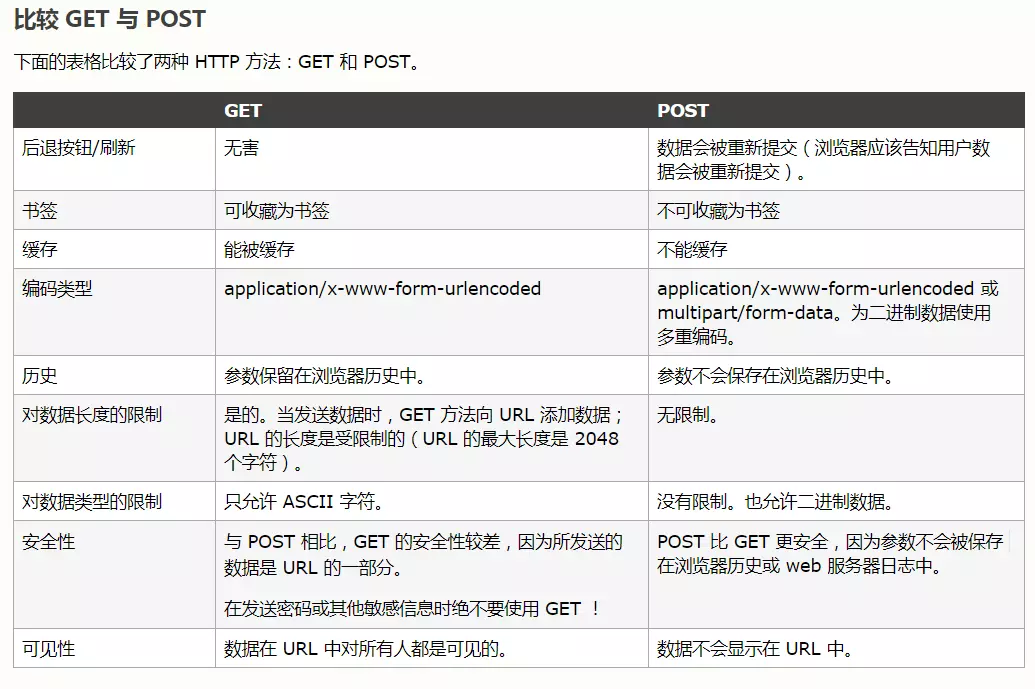